U.S. UFO Sightings
-------------------------------------------------------------
Analysis - This notebook explores the number of sightings in the US with respect to the shape of the UFO. It also looks at the trend of sightings along 6 decades (1960's to 2010's). The reason for this is because the number of sightings became significant in the 1960's.

Donut graphs were produced to show the distribution of the 8 most cited shapes in each decade. After looking at these graphs, a line chart was produced to show the trend of number of sitings per shape by decade.

Last a table was made to show the ranking of the top 8 shapes in each decade.

This analysis comes from the clean version of our UFO Data, which includes filtering to only those sightings within the United States.




In [193]:
import requests
# from config_weather_api_key import api_key
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import hvplot.pandas


# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [139]:
# Read the CSV file
df = pd.read_csv("../Data/clean_UFO.csv")

#View the first 5 rows 
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True


In [140]:
df.nunique()

Date_time                      55652
city                           11235
state/province                    52
country                            1
UFO_shape                         19
length_of_encounter_seconds      460
description                    63321
latitude                       11495
longitude                      12293
year                              83
month                             12
is_weekend                         2
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    63553 non-null  object 
 1   city                         63553 non-null  object 
 2   state/province               63553 non-null  object 
 3   country                      63553 non-null  object 
 4   UFO_shape                    63553 non-null  object 
 5   length_of_encounter_seconds  63553 non-null  float64
 6   description                  63553 non-null  object 
 7   latitude                     63553 non-null  float64
 8   longitude                    63553 non-null  float64
 9   year                         63553 non-null  int64  
 10  month                        63553 non-null  int64  
 11  is_weekend                   63553 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 5.4+ MB


In [142]:
# test the endpoint 
# url =f"http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid={api_key}"


In [143]:
# display the data 

# response=requests.get(url)
# print (response.status_code)

# data= response.json()
# data

In [144]:
# dropping columns 
df_city = df.drop (['Date_time'],axis=1)
df_city

,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True
...,...,...,...,...,...,...,...,...,...,...,...
63548,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,36.165833,-86.784444,2013,9,False
63549,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,43.613611,-116.202500,2013,9,False
63550,napa,ca,us,other,1200.0,Napa UFO&#44,38.297222,-122.284444,2013,9,False
63551,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,38.901111,-77.265556,2013,9,False


In [145]:
df_city = df.drop (['country','Date_time','UFO_shape','length_of_encounter_seconds','description','year','month','is_weekend'],axis=1)
df_city.value_counts()

city                                                       state/province  latitude   longitude  
seattle                                                    wa              47.606389  -122.330833    471
phoenix                                                    az              33.448333  -112.073333    434
las vegas                                                  nv              36.175000  -115.136389    352
los angeles                                                ca              34.052222  -118.242778    347
san diego                                                  ca              32.715278  -117.156389    327
                                                                                                    ... 
middlefield (on county line&#44 geauga_trumbull counties)  oh              41.461944  -81.073889       1
middlefield                                                oh              41.461944  -81.073889       1
middlebury                                                 vt 

In [146]:
state_list = sorted(df_city['state/province'].unique().tolist())
print(state_list)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [147]:
# defining US region groupings, and making a new column for "region"
southwest = ['az','tx','nm','ok']
southeast = ['al','ar','la','ms','tn','ky','wv','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','md','ri','ct','nj','de','pa','ny']
middle_west = ['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh']
west = ['wa', 'mt', 'or', 'id', 'wy', 'co', 'nm', 'ca', 'az', 'nv', 'ut', 'ak', 'hi']
df["region"] = None

df.loc[df["state/province"].isin(southwest), "region"] = "Southwest"
df.loc[df["state/province"].isin(southeast), "region"] = "Southeast"
df.loc[df["state/province"].isin(northeast), "region"] = "Northeast"
df.loc[df["state/province"].isin(middle_west), "region"] = "Middle West"
df.loc[df["state/province"].isin(west), "region"] = "West"

In [148]:
# look at counts per region
df.region.value_counts()

West           21591
Southeast      13439
Middle West    13320
Northeast      11060
Southwest       4112
Name: region, dtype: int64

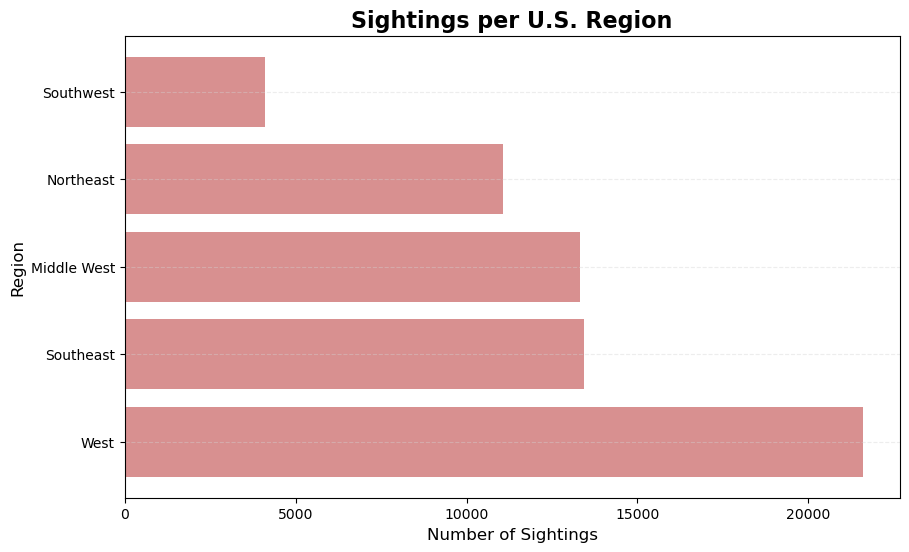

In [149]:
# Make a bar chart for number of sightings per city
regions = ["West", "Southeast", "Middle West", "Northeast", "Southwest"]
sightings_count = df.region.value_counts()

# init the plot
plt.figure(figsize=(10,6))
plt.barh(regions, sightings_count, color='firebrick', alpha=0.5, align="center")

# customize the plot
plt.title("Sightings per U.S. Region", fontsize=16, fontweight="bold")
plt.xlabel("Number of Sightings", fontsize=12)
plt.ylabel("Region", fontsize=12)


plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# show the plot
plt.show()

In [17]:
year_list = sorted(df['year'].unique().tolist())
print(year_list)

[1910, 1920, 1925, 1929, 1931, 1934, 1936, 1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [18]:
# Create the bins for sightings by decades
bins = [0, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

# Create the names for the five bins
group_labels = ["1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

In [150]:
# Slice the data and place it into bins
pd.cut(df["year"], bins, labels=group_labels).value_counts()

2000s    30158
2010s    22014
1990s     6500
1970s     1823
1980s     1588
1960s     1045
1950s      336
1940s       75
1930s        9
1920s        3
1910s        2
Name: year, dtype: int64

In [151]:
# Place the decade data into a new column inside of the DataFrame
df["Decades"] = pd.cut(df["year"], bins, labels=group_labels)
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,region,Decades
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False,Southwest,1940s
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False,Southwest,1950s
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False,West,1960s
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False,Southeast,1960s
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True,Northeast,1960s


In [152]:
shape_list = sorted(df['UFO_shape'].unique().tolist())
print(shape_list)

['changing', 'chevron', 'cigar', 'circle', 'cone', 'cross', 'cylinder', 'diamond', 'disk', 'fireball', 'flash', 'formation', 'light', 'other', 'oval', 'rectangle', 'sphere', 'teardrop', 'triangle']


In [153]:
df_shape = df[["UFO_shape","Decades"]].copy()
df_shape

,UFO_shape,Decades
0,cylinder,1940s
1,circle,1950s
2,light,1960s
3,sphere,1960s
4,disk,1960s
...,...,...
63548,light,2010s
63549,circle,2010s
63550,other,2010s
63551,circle,2010s


In [154]:
df_2010 = df_shape.loc[df_shape["Decades"] == "2010s"]
df_2010.reset_index()

,index,UFO_shape,Decades
0,171,light,2010s
1,172,circle,2010s
2,173,circle,2010s
3,174,formation,2010s
4,175,light,2010s
...,...,...,...
22009,63548,light,2010s
22010,63549,circle,2010s
22011,63550,other,2010s
22012,63551,circle,2010s


In [155]:
# Create DF's for looking at shape distribution over time
df_2010s = df_shape.loc[df_shape["Decades"] == "2010s"]
df_2000s = df_shape.loc[df_shape["Decades"] == "2000s"]
df_1990s = df_shape.loc[df_shape["Decades"] == "1990s"]
df_1980s = df_shape.loc[df_shape["Decades"] == "1980s"]
df_1970s = df_shape.loc[df_shape["Decades"] == "1970s"]
df_1960s = df_shape.loc[df_shape["Decades"] == "1960s"]
df_1950s = df_shape.loc[df_shape["Decades"] == "1950s"]

In [156]:
df_1950s

,UFO_shape,Decades
1,circle,1950s
388,disk,1950s
389,disk,1950s
390,circle,1950s
391,rectangle,1950s
...,...,...
62696,disk,1950s
63027,other,1950s
63364,circle,1950s
63365,disk,1950s


In [157]:
# looking at most popular shapes in decades
df_2010s.value_counts()
# light, other, fireball, circle, triangle, sphere, oval, disk, formation, changing

UFO_shape  Decades
light      2010s      4842
other      2010s      2753
fireball   2010s      2703
circle     2010s      2594
triangle   2010s      1961
sphere     2010s      1717
oval       2010s       985
disk       2010s       766
formation  2010s       738
changing   2010s       502
flash      2010s       406
cigar      2010s       366
teardrop   2010s       335
rectangle  2010s       330
diamond    2010s       324
cylinder   2010s       322
chevron    2010s       211
cone       2010s        81
cross      2010s        78
dtype: int64

In [158]:
# looking at most popular shapes in decades
df_2000s.value_counts()
# light, other, triangle, circle, sphere, disk, fireball, oval, formation, changing

UFO_shape  Decades
light      2000s      6844
other      2000s      4621
triangle   2000s      3254
circle     2000s      2622
sphere     2000s      1853
disk       2000s      1791
fireball   2000s      1758
oval       2000s      1451
formation  2000s       954
changing   2000s       881
cigar      2000s       826
teardrop   2000s       644
flash      2000s       536
rectangle  2000s       524
cylinder   2000s       507
diamond    2000s       450
chevron    2000s       426
cone       2000s       129
cross      2000s        87
dtype: int64

In [159]:
# looking at most popular shapes in decades
df_1990s.value_counts()
# light, other, triangle, fireball, disk, circle, sphere, oval, formation, cigar

UFO_shape  Decades
light      1990s      1231
other      1990s       958
triangle   1990s       904
fireball   1990s       553
disk       1990s       484
circle     1990s       465
sphere     1990s       435
oval       1990s       258
formation  1990s       212
cigar      1990s       179
changing   1990s       138
teardrop   1990s       130
chevron    1990s       110
rectangle  1990s       106
cylinder   1990s       105
flash      1990s        99
diamond    1990s        93
cone       1990s        25
cross      1990s        15
dtype: int64

In [160]:
# looking at most popular shapes in decades
df_1980s.value_counts()
# other, disk, triangle, light, sphere, circle, oval, cigar, rectangle, fireball, formation

UFO_shape  Decades
other      1980s      289
disk       1980s      233
triangle   1980s      219
light      1980s      169
sphere     1980s      120
circle     1980s      118
oval       1980s       83
cigar      1980s       63
rectangle  1980s       54
fireball   1980s       45
formation  1980s       34
chevron    1980s       32
changing   1980s       32
cylinder   1980s       31
diamond    1980s       29
teardrop   1980s       24
flash      1980s        7
cone       1980s        4
cross      1980s        2
dtype: int64

In [30]:
# looking at most popular shapes in decades
df_1970s.value_counts()
# disk, light, other, circle, triangle, oval, sphere, cigar, rectangle, fireball

UFO_shape  Decades
disk       1970s      452
light      1970s      228
other      1970s      214
circle     1970s      174
triangle   1970s      164
oval       1970s      139
sphere     1970s      109
cigar      1970s       97
rectangle  1970s       44
fireball   1970s       44
cylinder   1970s       32
formation  1970s       26
chevron    1970s       25
changing   1970s       22
teardrop   1970s       19
diamond    1970s       16
flash      1970s        8
cone       1970s        6
cross      1970s        4
dtype: int64

In [161]:
df_1960s.value_counts()

UFO_shape  Decades
disk       1960s      268
other      1960s      147
light      1960s      115
circle     1960s      104
sphere     1960s       83
oval       1960s       82
cigar      1960s       78
triangle   1960s       47
fireball   1960s       29
formation  1960s       17
cylinder   1960s       17
teardrop   1960s       16
changing   1960s       10
diamond    1960s        9
chevron    1960s        8
rectangle  1960s        8
flash      1960s        4
cross      1960s        2
cone       1960s        1
dtype: int64

In [163]:
# df of the shape counts in each decade
df_60s_counts = df_1960s["UFO_shape"].value_counts()
df_70s_counts = df_1970s["UFO_shape"].value_counts()
df_80s_counts = df_1980s["UFO_shape"].value_counts()
df_90s_counts = df_1990s["UFO_shape"].value_counts()
df_2000s_counts = df_2000s["UFO_shape"].value_counts()
df_2010s_counts = df_2010s["UFO_shape"].value_counts()


In [162]:
df_90s_counts

light        1231
other         958
triangle      904
fireball      553
disk          484
circle        465
sphere        435
oval          258
formation     212
cigar         179
changing      138
teardrop      130
chevron       110
rectangle     106
cylinder      105
flash          99
diamond        93
cone           25
cross          15
Name: UFO_shape, dtype: int64

In [164]:
# looking at most popular shapes in decades
df_60s_counts = df_1960s["UFO_shape"].value_counts()
# disk, other, light, circle, sphere, oval, cigar, triangle, fireball, formation

In [165]:
# dataframes with number of sightings of top 8 shapes for each decades
df_top_8_2010_counts = df_2010s_counts.iloc[:8]
df_top_8_2000_counts = df_2000s_counts.iloc[:8]
df_top_8_1990_counts = df_90s_counts.iloc[:8]
df_top_8_1980_counts = df_80s_counts.iloc[:8]
df_top_8_1970_counts = df_70s_counts.iloc[:8]
df_top_8_1960_counts = df_60s_counts.iloc[:8]
# look at output of one of the new df's
df_top_8_1960_counts

disk        268
other       147
light       115
circle      104
sphere       83
oval         82
cigar        78
triangle     47
Name: UFO_shape, dtype: int64

In [166]:

# testindex = pd.DataFrame(df_top_8_2010_counts, columns = ["Count"], 
#                          index= ["Light","Other","Fireball","Circle","Triangle","Sphere","Oval","Disk"])
# testindex.reset_index(inplace = True)
# testindex


#making dataframes for most popular shapes per decade. Shapes are in order.
shape_columns_2010 = pd.DataFrame(df_top_8_2010_counts, columns = ["Count"], 
                         index= ["Light","Other","Fireball","Circle","Triangle","Sphere","Oval","Disk"])
shape_columns_2000 = pd.DataFrame(df_top_8_2000_counts, columns = ["Count"], 
                         index= ["Light","Other","Triangle","Circle","Sphere","Disk","Fireball","Oval"])
shape_columns_1990 = pd.DataFrame(df_top_8_1990_counts, columns = ["Count"], 
                         index= ["Light","Other","Triangle","Fireball","Disk","Circle","Sphere","Oval"])
shape_columns_1980 = pd.DataFrame(df_top_8_1980_counts, columns = ["Count"], 
                         index= ["Other","Disk","Triangle","Light","Sphere","Circle","Oval","Cigar"])
shape_columns_1970 = pd.DataFrame(df_top_8_1970_counts, columns = ["Count"], 
                         index= ["Disk","Light","Other","Circle","Triangle","Oval","Sphere","Cigar"])
shape_columns_1960 = pd.DataFrame(df_top_8_1960_counts, columns = ["Count"], 
                         index= ["Disk","Other","Light","Circle","Sphere","Oval","Cigar","Triangle"])



shape_columns_2010.reset_index(inplace = True)
shape_columns_2000.reset_index(inplace = True)
shape_columns_1990.reset_index(inplace = True)
shape_columns_1980.reset_index(inplace = True)
shape_columns_1970.reset_index(inplace = True)
shape_columns_1960.reset_index(inplace = True)

shape_columns_2010_rename = shape_columns_2010.rename(columns={"index":"2010s", "UFO_shape":"nuulls"})
shape_columns_2000_rename = shape_columns_2000.rename(columns={"index":"2000s", "UFO_shape":"nuulls"})
shape_columns_1990_rename = shape_columns_1990.rename(columns={"index":"1990s", "UFO_shape":"nuulls"})
shape_columns_1980_rename = shape_columns_1980.rename(columns={"index":"1980s", "UFO_shape":"nuulls"})
shape_columns_1970_rename = shape_columns_1970.rename(columns={"index":"1970s", "UFO_shape":"nuulls"})
shape_columns_1960_rename = shape_columns_1960.rename(columns={"index":"1960s", "UFO_shape":"nuulls"})

dropcolumn_2010 = shape_columns_2010_rename.iloc[:,:-1]
dropcolumn_2000 = shape_columns_2000_rename.iloc[:,:-1]
dropcolumn_1990 = shape_columns_1990_rename.iloc[:,:-1]
dropcolumn_1980 = shape_columns_1980_rename.iloc[:,:-1]
dropcolumn_1970 = shape_columns_1970_rename.iloc[:,:-1]
dropcolumn_1960 = shape_columns_1960_rename.iloc[:,:-1]

#look at one of my new columns with column being decade and list being shapes in most-sightings order
dropcolumn_2010


# testindex

# shape_columns_2010

,2010s
0,Light
1,Other
2,Fireball
3,Circle
4,Triangle
5,Sphere
6,Oval
7,Disk


In [195]:
# merge df's into one 

df_decade_shape_merge = pd.concat([dropcolumn_1960,
                                   dropcolumn_1970,
                                   dropcolumn_1980,
                                   dropcolumn_1990,
                                   dropcolumn_2000,
                                   dropcolumn_2010], axis = 1)



df_decade_shape_merge = df_decade_shape_merge.style.apply(lambda x: ["background-color: YELLOW" if 'Light' in v else "" for v in x], axis = 1)\
    .apply(lambda x: ["background-color: SLATEGREY" if 'Other' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: RED" if 'Fireball' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: SKYBLUE" if 'Circle' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: VIOLET" if 'Triangle' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: DODGERBLUE" if 'Sphere' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: CYAN" if 'Oval' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: LIME" if 'Disk' in v else "" for v in x], axis = 1)\
            .apply(lambda x: ["background-color: PERU" if 'Cigar' in v else "" for v in x], axis = 1)\



df_decade_shape_merge
df_decade_shape_merge.to_html("decade_shapes.html")

In [196]:
df_decade_shape_merge

,1960s,1970s,1980s,1990s,2000s,2010s
0,Disk,Disk,Other,Light,Light,Light
1,Other,Light,Disk,Other,Other,Other
2,Light,Other,Triangle,Triangle,Triangle,Fireball
3,Circle,Circle,Light,Fireball,Circle,Circle
4,Sphere,Triangle,Sphere,Disk,Sphere,Triangle
5,Oval,Oval,Circle,Circle,Disk,Sphere
6,Cigar,Sphere,Oval,Sphere,Fireball,Oval
7,Triangle,Cigar,Cigar,Oval,Oval,Disk


In [115]:
testindexrename = testindex.rename(columns={"index":"2010s", "UFO_shape":"nuulls"})
dropcolumn = testindexrename.iloc[:,:-1]
dropcolumn


,2010s
0,Light
1,Other
2,Fireball
3,Circle
4,Triangle
5,Sphere
6,Oval
7,Disk


In [87]:
df_merge = pd.concat([df_top_8_1960_counts,
                      df_top_8_1970_counts,
                      df_top_8_1980_counts,
                      df_top_8_1990_counts,
                      df_top_8_2000_counts,
                      df_top_8_2010_counts], axis = 1)

In [88]:
df_merge

,UFO_shape,UFO_shape,UFO_shape,UFO_shape,UFO_shape,UFO_shape
disk,268.0,452.0,233.0,484.0,1791.0,766.0
other,147.0,214.0,289.0,958.0,4621.0,2753.0
light,115.0,228.0,169.0,1231.0,6844.0,4842.0
circle,104.0,174.0,118.0,465.0,2622.0,2594.0
sphere,83.0,109.0,120.0,435.0,1853.0,1717.0
oval,82.0,139.0,83.0,258.0,1451.0,985.0
cigar,78.0,97.0,63.0,NaN,NaN,NaN
triangle,47.0,164.0,219.0,904.0,3254.0,1961.0
fireball,NaN,NaN,NaN,553.0,1758.0,2703.0


In [36]:
df_60s_counts

disk         268
other        147
light        115
circle       104
sphere        83
oval          82
cigar         78
triangle      47
fireball      29
cylinder      17
formation     17
teardrop      16
changing      10
diamond        9
chevron        8
rectangle      8
flash          4
cross          2
cone           1
Name: UFO_shape, dtype: int64

In [37]:
df_top_8_2010_counts

light       4842
other       2753
fireball    2703
circle      2594
triangle    1961
sphere      1717
oval         985
disk         766
Name: UFO_shape, dtype: int64

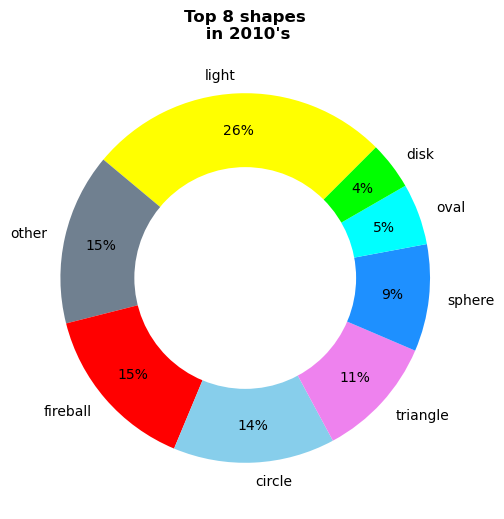

In [38]:
# # Donut chart to look at top 8 shapes in 2010s

# # configure the chart
plt.figure(figsize=(10,6))
plt.pie(df_top_8_2010_counts.values,
        labels=df_top_8_2010_counts.index,
        autopct="%1.f%%",
        colors=["YELLOW","SLATEGREY","RED","SKYBLUE","VIOLET","DODGERBLUE", "CYAN", "LIME"],
        # LIST OF SHAPES
        #colors=["LIGHT","OTHER","FIREBALL","CIRCLE","TRIANGLE","SPHERE", "OVAL", "DISK"],
        pctdistance=0.80,
        startangle=45)

# draw the chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 shapes\n in 2010's", fontweight="bold")
#plt.axis("equal")

# order counts - makes png file
plt.savefig("top_8_2010.png")
plt.show()

In [39]:
df_top_8_2000_counts

light       6844
other       4621
triangle    3254
circle      2622
sphere      1853
disk        1791
fireball    1758
oval        1451
Name: UFO_shape, dtype: int64

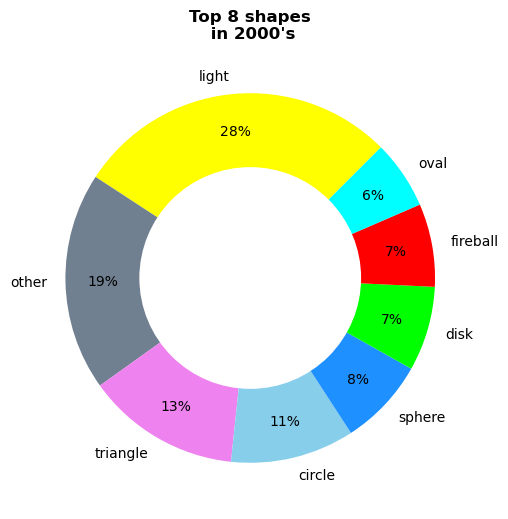

In [40]:
# # Donut chart to look at top 8 shapes in 2000s

# # configure the chart
plt.figure(figsize=(10,6))
plt.pie(df_top_8_2000_counts.values,
        labels=df_top_8_2000_counts.index,
        autopct="%1.f%%",
        colors=["YELLOW","SLATEGREY","VIOLET","SKYBLUE","DODGERBLUE","LIME", "RED", "CYAN"],
        # LIST OF SHAPES
        #colors=["LIGHT","OTHER","TRIANGLE","CIRCLE","SPHERE", "DISK", "FIREBALL", "OVAL"],
        pctdistance=0.80,
        startangle=45)

# # draw the chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 shapes\n in 2000's", fontweight="bold")
#plt.axis("equal")

# order counts - makes png file
plt.savefig("top_8_2000.png")
plt.show()

In [41]:
df_top_8_1990_counts

light       1231
other        958
triangle     904
fireball     553
disk         484
circle       465
sphere       435
oval         258
Name: UFO_shape, dtype: int64

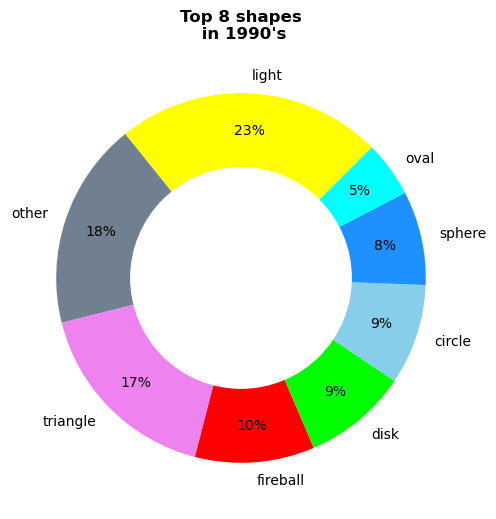

In [42]:
# # Donut chart to look at top 8 shapes in 1990s

# # configure the chart
plt.figure(figsize=(10,6))
plt.pie(df_top_8_1990_counts.values,
        labels=df_top_8_1990_counts.index,
        autopct="%1.f%%",
        colors=["YELLOW","SLATEGREY","VIOLET","RED","LIME","SKYBLUE", "DODGERBLUE", "CYAN"],
        # LIST OF SHAPES
        #colors=["LIGHT","OTHER","TRIANGLE","FIREBALL", "DISK", "CIRCLE", "SPHERE", "OVAL"],
        pctdistance=0.80,
        startangle=45)

# # draw the chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 shapes\n in 1990's", fontweight="bold")
# order counts - makes png file
plt.savefig("top_8_1990.png")
plt.show()

In [43]:
df_top_8_1980_counts

other       289
disk        233
triangle    219
light       169
sphere      120
circle      118
oval         83
cigar        63
Name: UFO_shape, dtype: int64

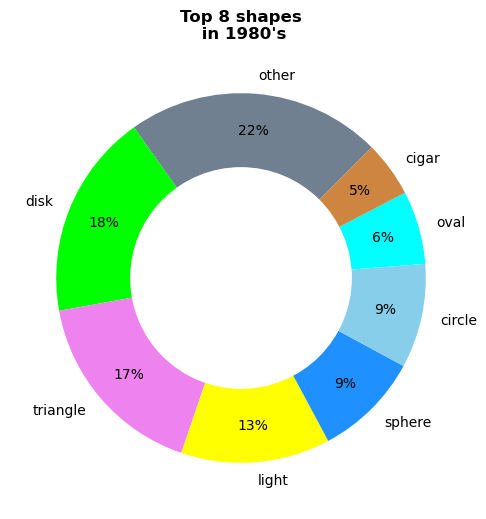

In [44]:
# # Donut chart to look at top 8 shapes in 1980s

# # configure the chart
plt.figure(figsize=(10,6))
plt.pie(df_top_8_1980_counts.values,
        labels=df_top_8_1980_counts.index,
        autopct="%1.f%%",
        colors=["SLATEGREY", "LIME", "VIOLET", "YELLOW","DODGERBLUE","SKYBLUE", "CYAN", "PERU"],
        # LIST OF SHAPES
        #colors=["OTHER", "DISK", "TRIANGLE", "LIGHT", "SPHERE", "CIRCLE", "OVAL", "CIGAR" ],
        pctdistance=0.80,
        startangle=45)

# # draw the chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 shapes\n in 1980's", fontweight="bold")

# order counts - makes png file
plt.savefig("top_8_1980.png")
plt.show()

In [45]:
df_top_8_1970_counts

disk        452
light       228
other       214
circle      174
triangle    164
oval        139
sphere      109
cigar        97
Name: UFO_shape, dtype: int64

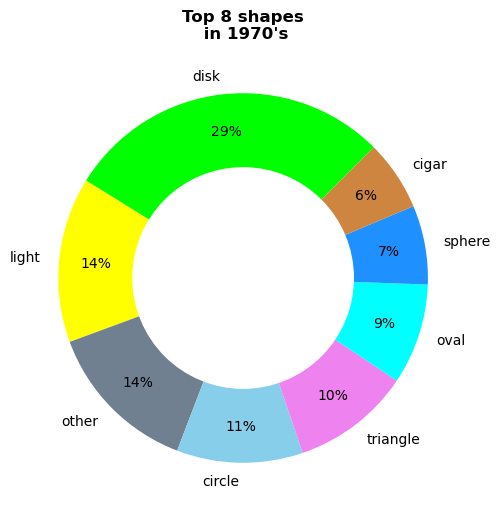

In [46]:
# # Donut chart to look at top 8 shapes in 1970s

# # configure the chart
plt.figure(figsize=(10,6))
plt.pie(df_top_8_1970_counts.values,
        labels=df_top_8_1970_counts.index,
        autopct="%1.f%%",
        colors=["LIME","YELLOW","SLATEGREY","SKYBLUE","VIOLET","CYAN", "DODGERBLUE", "PERU"],
        # LIST OF SHAPES
        #colors=["DISK", "LIGHT", "OTHER", "CIRCLE", "TRIANGLE", "OVAL", "SPHERE", "CIGAR" ],
        pctdistance=0.80,
        startangle=45)

# # draw the chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 shapes\n in 1970's", fontweight="bold")

# order counts - makes png file
plt.savefig("top_8_1970.png")
plt.show()

In [47]:
df_top_8_1960_counts

disk        268
other       147
light       115
circle      104
sphere       83
oval         82
cigar        78
triangle     47
Name: UFO_shape, dtype: int64

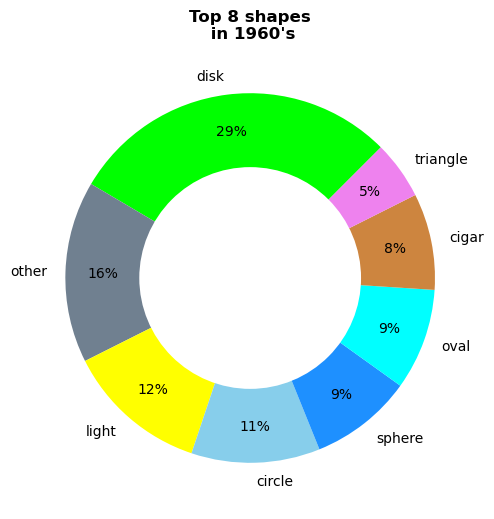

In [48]:
# # Donut chart to look at top 8 shapes in 1960s

# # configure the chart
plt.figure(figsize=(10,6))
plt.pie(df_top_8_1960_counts.values,
        labels=df_top_8_1960_counts.index,
        autopct="%1.f%%",
        colors=["LIME","SLATEGREY","YELLOW","SKYBLUE","DODGERBLUE","CYAN", "PERU", "VIOLET"],
        # LIST OF SHAPES
        #colors=["DISK", "OTHER", "LIGHT", "CIRCLE", "SPHERE", "OVAL", "CIGAR", "TRIANGLE" ],
        pctdistance=0.80,
        startangle=45)

# # draw the chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 8 shapes\n in 1960's", fontweight="bold")

# order counts - makes png file
plt.savefig("top_8_1960.png")
plt.show()

In [49]:
# look at timeline (by decade) of number of sightings of each shape (x-axis: decades, y-axis: number of sightings)

In [50]:
df_shape

,UFO_shape,Decades
0,cylinder,1940s
1,circle,1950s
2,light,1960s
3,sphere,1960s
4,disk,1960s
...,...,...
63548,light,2010s
63549,circle,2010s
63550,other,2010s
63551,circle,2010s


In [51]:
df_shape.groupby("Decades").agg({"UFO_shape": ["count"]}) * 100 / df_shape.shape[0]

,UFO_shape
,count
Decades,
1910s,0.003147
1920s,0.004720
1930s,0.014161
1940s,0.118012
1950s,0.528693
1960s,1.644297
1970s,2.868472
1980s,2.498702


In [52]:
df_shape.size

127106

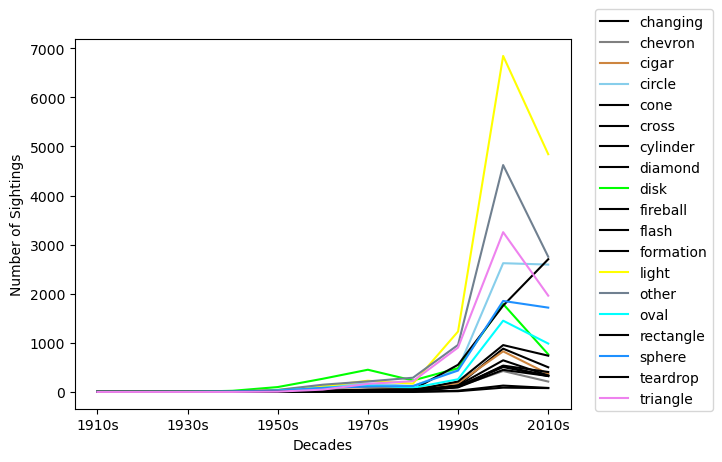

In [53]:
df_shape.pivot_table(index=['Decades'],columns='UFO_shape',aggfunc='size').plot(kind='line', 
    color = ["BLACK", "GRAY", "PERU", "SKYBLUE", "black", "black", "black", "black", "LIME", "black",
             "black", "black", "YELLOW", "SLATEGREY", "CYAN", "black", "DODGERBLUE", "black", "VIOLET"])
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))
plt.xlabel("Decades")
plt.ylabel("Number of Sightings")

plt.savefig("NumSighting_v_Time.png", format='png', dpi=1000)
plt.show()

In [50]:
df_shape

,UFO_shape,Decades
0,cylinder,1940s
1,circle,1950s
2,light,1960s
3,sphere,1960s
4,disk,1960s
...,...,...
63548,light,2010s
63549,circle,2010s
63550,other,2010s
63551,circle,2010s


In [54]:
df_shape.groupby("Decades")["UFO_shape"].describe().head(15).style.background_gradient(cmap = "Blues")

,count,unique,top,freq
Decades,,,,
1910s,2,2,disk,1
1920s,3,2,disk,2
1930s,9,7,oval,2
1940s,75,13,disk,23
1950s,336,17,disk,99
1960s,1045,19,disk,268
1970s,1823,19,disk,452
1980s,1588,19,other,289
1990s,6500,19,light,1231


In [75]:
#df_shape.groupby("UFO_shape")["Decades"].describe().head(50)
testing = df_shape.groupby("UFO_shape")["Decades"].head()
testing

0       1940s
1       1950s
2       1960s
3       1960s
4       1960s
        ...  
1699    2000s
1938    2000s
2092    2000s
2111    2000s
2640    2000s
Name: Decades, Length: 95, dtype: category
Categories (11, object): ['1910s' < '1920s' < '1930s' < '1940s' ... '1980s' < '1990s' < '2000s' < '2010s']

In [56]:
df_shape.groupby("Decades")["UFO_shape"].describe()

,count,unique,top,freq
Decades,,,,
1910s,2,2,disk,1
1920s,3,2,disk,2
1930s,9,7,oval,2
1940s,75,13,disk,23
1950s,336,17,disk,99
1960s,1045,19,disk,268
1970s,1823,19,disk,452
1980s,1588,19,other,289
1990s,6500,19,light,1231


In [86]:
df_shape.groupby("UFO_shape")["Decades"].count()

UFO_shape
changing      1585
chevron        815
cigar         1643
circle        6119
cone           247
cross          188
cylinder      1026
diamond        928
disk          4121
fireball      5149
flash         1062
formation     1990
light        13471
other         9035
oval          3030
rectangle     1070
sphere        4346
teardrop      1173
triangle      6555
Name: Decades, dtype: int64

NameError: name 'df_whats' is not defined